<img src="./logo_UNSAM.jpg" align="right" width="150" />

# Tarea semanal 7
#### Análisis y procesaimento de señales
**Kala Ariadna Guevara, Carola Piazze Vicini**


### Introducción

En este trabajo práctico se analizaron distintos sistemas LTI definidos por ecuaciones en diferencias, todos ellos representando variantes de filtros digitales simples. El objetivo fue caracterizar su comportamiento en el dominio de frecuencia.

Para cada sistema se determinará la función de transferencia $T(z) = \frac{Y(z)}{X(z)}$, que describe la relación entre la señal de salida $y(n)$ y la señal de entrada $x(n)$ en el dominio Z. Esta función permite analizar la respuesta del sistema frente a diferentes frecuencias.

A partir de $T(z)$, se calculó la respuesta en frecuencia evaluando la función sobre la circunferencia unitaria $z = e^{j\omega}$. Esto permite obtener:

- El **módulo** $|T(e^{j\omega})|$, que indica la ganancia del sistema para cada frecuencia.
- La **fase** $\angle T(e^{j\omega})$, que representa el desfase introducido por el sistema.

Finalmente, se simuló la respuesta en frecuencia de cada sistema con código, para verificar los resultados obtenidos  a mano.


In [2]:
from IPython.display import IFrame
IFrame("./Tp7_251112_152923.pdf", width=1000, height=1000)

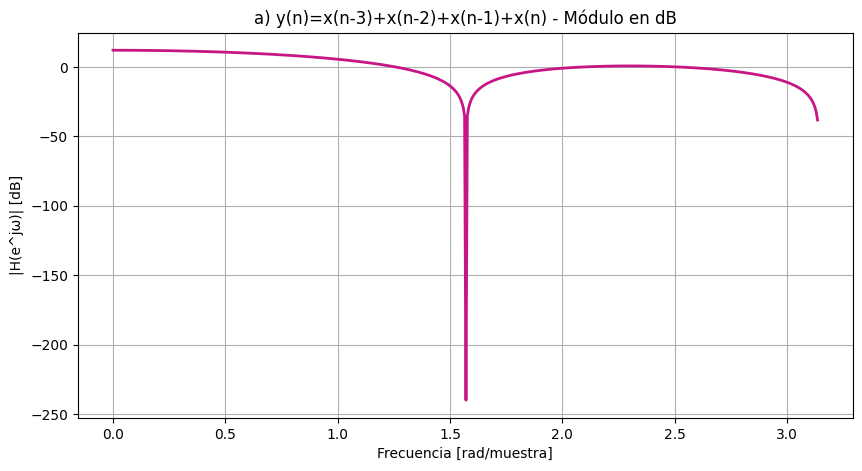

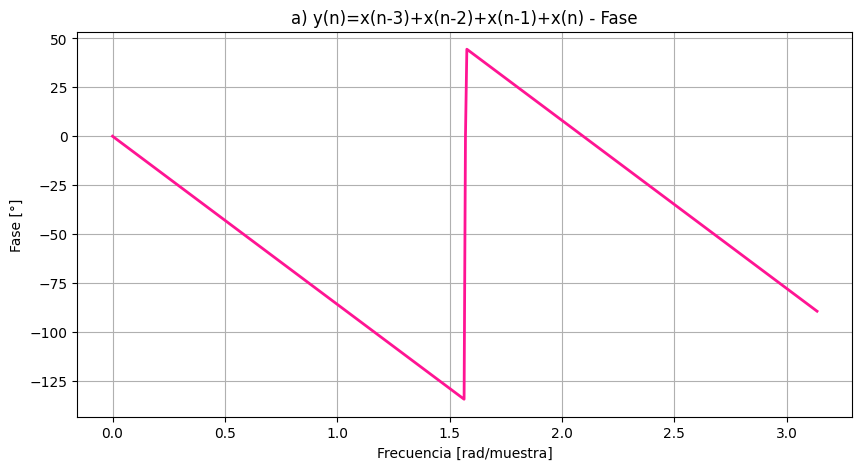


a) y(n)=x(n-3)+x(n-2)+x(n-1)+x(n)
  Módulo máximo = 4.000
  Fase final (último punto) = -89.47°


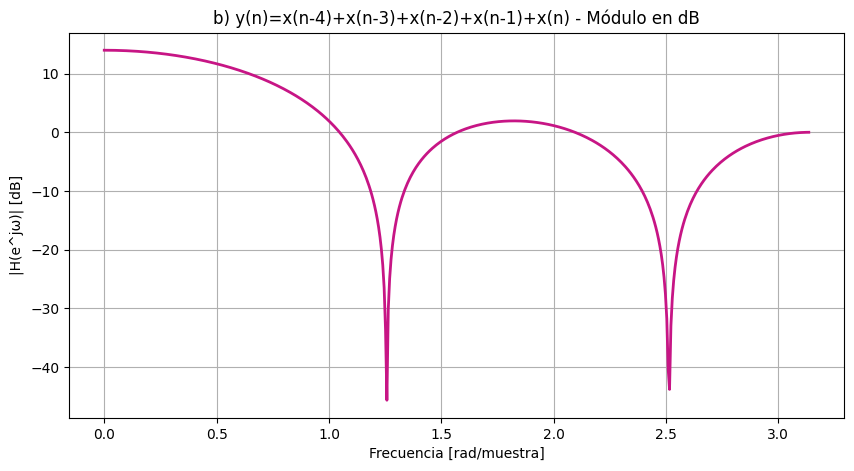

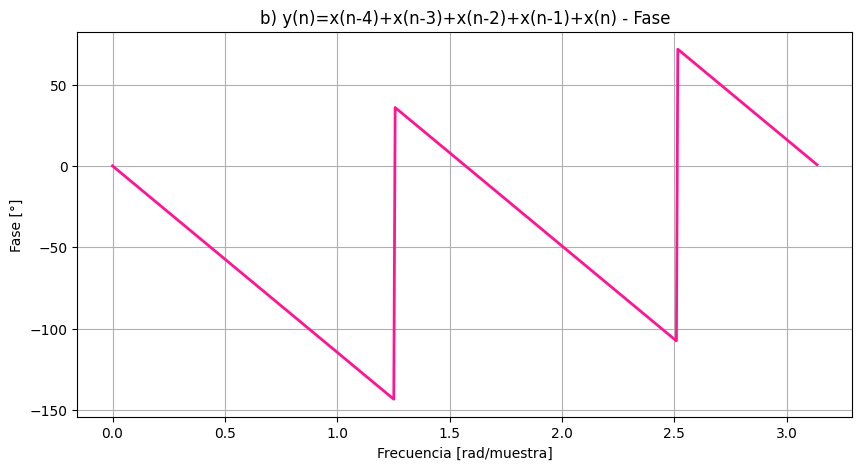


b) y(n)=x(n-4)+x(n-3)+x(n-2)+x(n-1)+x(n)
  Módulo máximo = 5.000
  Fase final (último punto) = 0.70°


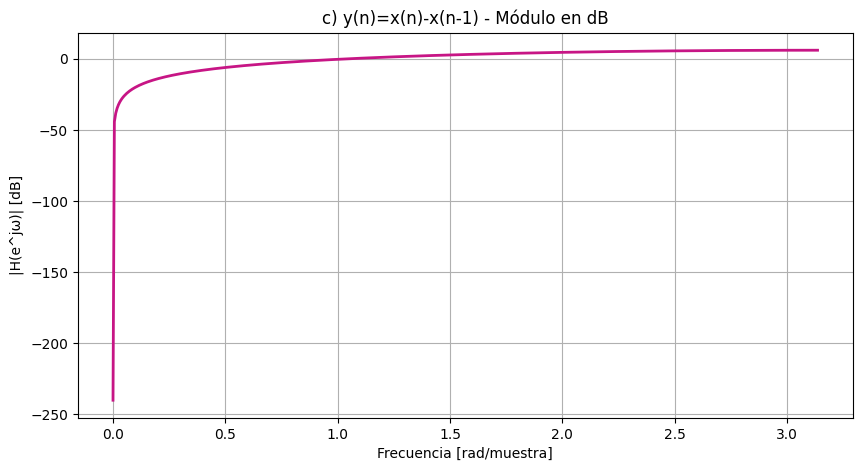

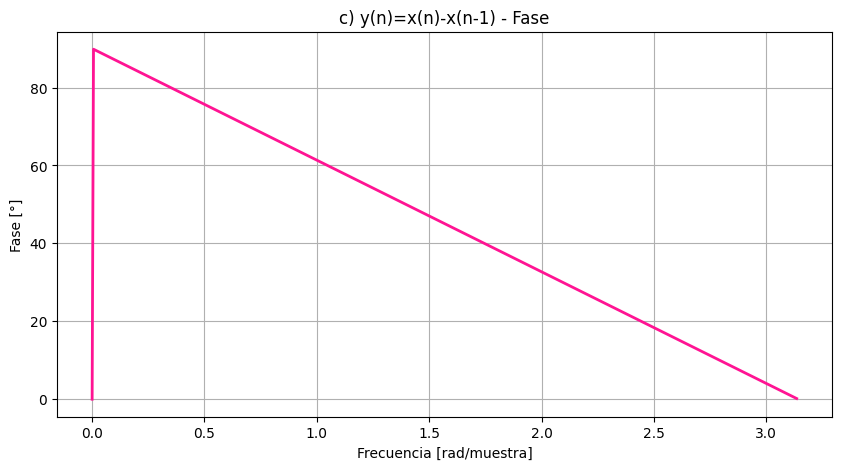


c) y(n)=x(n)-x(n-1)
  Módulo máximo = 2.000
  Fase final (último punto) = 0.18°


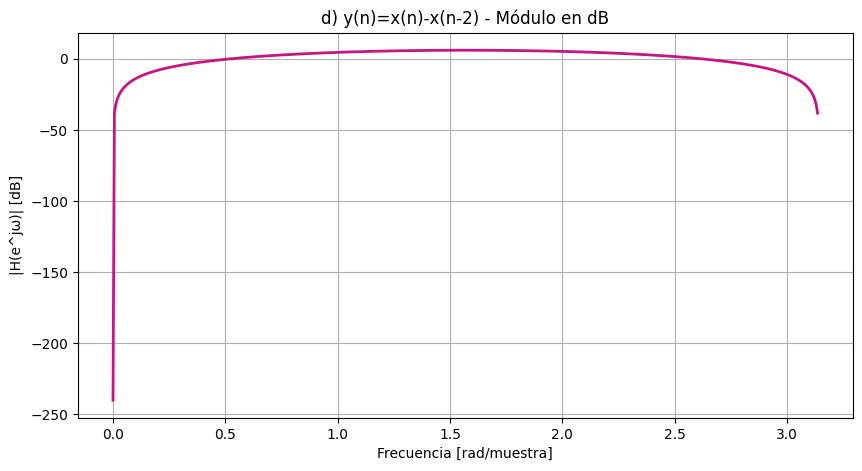

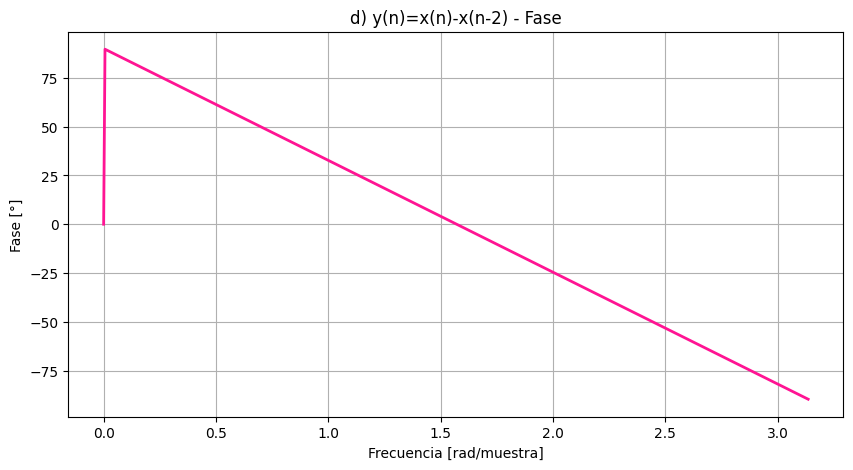


d) y(n)=x(n)-x(n-2)
  Módulo máximo = 2.000
  Fase final (último punto) = -89.65°


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

#copio el a b c de la consigna
#es casi igual al ts6
sistemas = {
    "a) y(n)=x(n-3)+x(n-2)+x(n-1)+x(n)": ([1, 1, 1, 1], [1]),
    "b) y(n)=x(n-4)+x(n-3)+x(n-2)+x(n-1)+x(n)": ([1, 1, 1, 1, 1], [1]),
    "c) y(n)=x(n)-x(n-1)": ([1, -1], [1]),
    "d) y(n)=x(n)-x(n-2)": ([1, 0, -1], [1]),
}

for nombre, (b, a) in sistemas.items():
    #rta en frec
    w, h = signal.freqz(b, a, worN=512)  
    mag = np.abs(h)
    fase = np.angle(h)

    #grafico modulo
    plt.figure(figsize=(10, 5))
    plt.plot(w, 20 * np.log10(mag + 1e-12), color='mediumvioletred', linewidth=2)
    plt.title(f"{nombre} - Módulo en dB")
    plt.xlabel('Frecuencia [rad/muestra]')
    plt.ylabel('|H(e^jω)| [dB]')
    plt.grid(True)
    plt.show()

    #grafico fase
    plt.figure(figsize=(10, 5))
    plt.plot(w, np.degrees(np.unwrap(fase)), color='deeppink', linewidth=2)
    plt.title(f"{nombre} - Fase")
    plt.xlabel('Frecuencia [rad/muestra]')
    plt.ylabel('Fase [°]')
    plt.grid(True)
    plt.show()

    #resultados
    print(f"\n{nombre}")
    print(f"  Módulo máximo = {np.max(mag):.3f}")
    print(f"  Fase final (último punto) = {np.degrees(fase[-1]):.2f}°")

### Comentario
Resolvimos la tarea con seguridad

La tarea nos ayudó a practicar los conceptos de la función de transferencia, la respuesta en módulo y fase.
Lo que nos resultó algo arduo fue el proceso de escribir las T en función de los senos y cosenos, eso hubo que repasarlo con el holton.

Usamos chatgpt para la revisión del código y la el formateo de las ecuaciones en markdown.

